In [ ]:
#*************************************************************************
# TRAINING MODELS
#*************************************************************************
# 1. Linear Regression
# 2. Decision Trees
# 3. Random Forest
# 4. Support Vector Machines
# 5. Neural Networks

#*************************************************************************
#                   4. SUPPORT VECTOR MACHINES
#*************************************************************************
# Support Vector Machines (SVM) are capable of performing linear or nonlinear

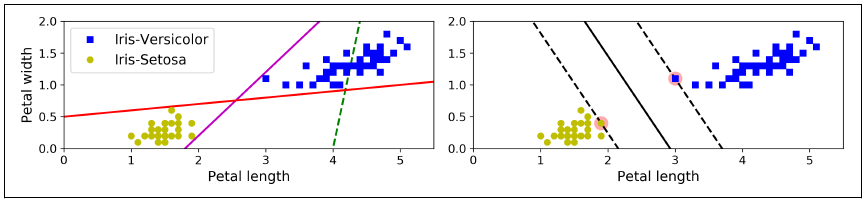

In [2]:
## Large margin classification
# The objective is to fit the widest possible "street" between the classes (in the first graph, the lines separate the two classes but are very close to the instances)
# The "support vectors" are the instances located on the edge of the street. New instances off the street will not affect the decision boundary at all.

# Important: SVMs are sensitive to the feature scales. Scale features!

#*************************************************************************
# Soft Margin Classification
#*************************************************************************
# If we strictly impose that all instances must be off the street and on the right side, this is called hard margin classification. There are two main issues with hard margin classification:
# 1. It only works if the data is linearly separable
# 2. It is sensitive to outliers

# To avoid these issues, it is preferable to use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (instances that end up in the middle of the street or even on the wrong side). This is called soft margin classification.
# In Scikit-Learn's SVM classes, you can control this balance using the C hyperparameter: a smaller C value leads to a wider street but more margin violations.

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

# making predictions
svm_clf.predict([[5.5, 1.7]])   # returns array([1.]) so the model predicts that this is an Iris-Virginica

# Unlike Logistic Regression classifiers, SVM classifiers do not output probabilities for each class.


c:\Users\fgrijalba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([1.])

In [4]:
# Another way:
# Using the SVC class (slow with large data sets)
# Or, SGDC Classifier, which applies Stochastic Gradient Descent to train a linear SVM classifier.

from sklearn.svm import SVC

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="linear", C=1)),
])

svm_clf.fit(X, y)

svm_clf.predict([[5.5, 1.7]])   # returns array([1.]) so the model predicts that this is an Iris-Virginica

array([1.])

In [ ]:
#*************************************************************************
# Nonlinear SVM Classification
#*************************************************************************
# Many datasets are not linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features. In some cases, this can result in a linearly separable dataset.

# Example: The first graph is not linearly separable. But if we add a second feature that is (x2 = (x1)^2), the resulting 2D dataset is linearly separable.

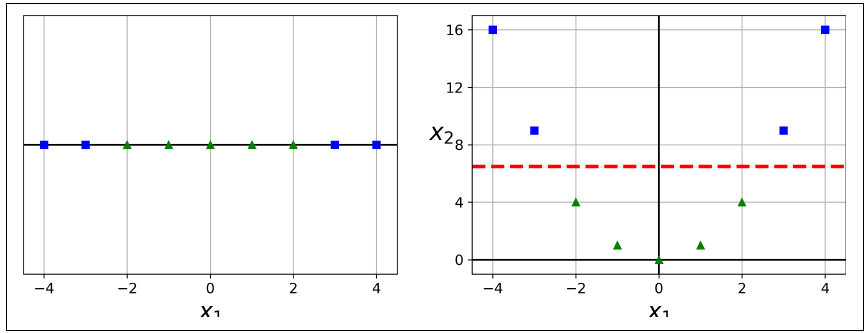

c:\Users\fgrijalba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fgrijalba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


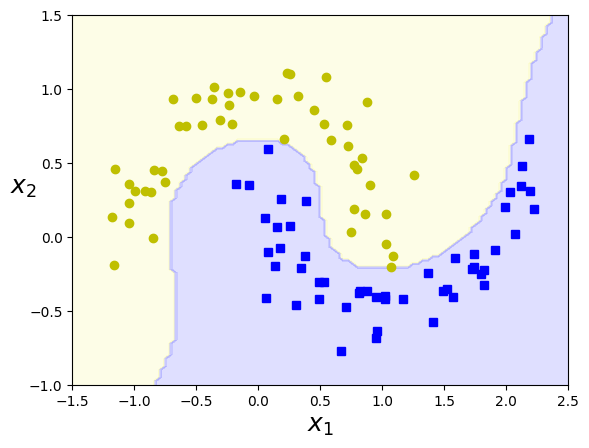

In [6]:
# Implementing it in Scikit-Learn:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

# Plotting the decision boundary
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff'])
    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
plot_decision_boundary(polynomial_svm_clf, X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


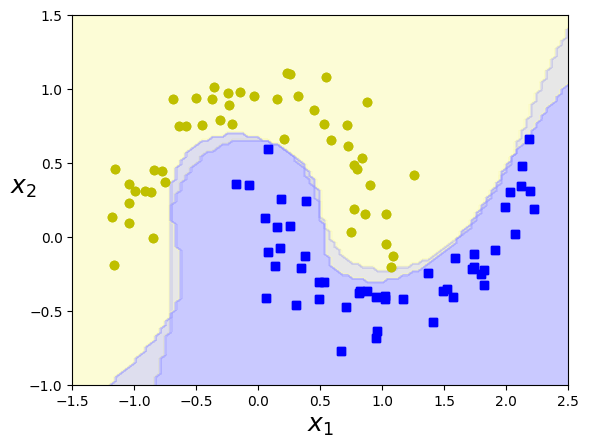

In [13]:
#*************************************************************************
# Polynomial Kernel
#*************************************************************************
# Adding polynomial features is simple to implement and can work well with all sorts of Machine Learning algorithms (not just SVMs).
# When using SVMs you can apply an almost miraculous mathematical technique called the kernel trick. It makes it possible to get the same result as if you added many polynomial features, even with very high-degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features since you don't actually add any features.
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))     # coef0 controls how much the model is influenced by high-degree polynomials versus low-degree polynomials
])

poly_kernel_svm_clf_10 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=20, C=5))     # coef0 controls how much the model is influenced by high-degree polynomials versus low-degree polynomials
])

poly_kernel_svm_clf.fit(X, y)
poly_kernel_svm_clf_10.fit(X, y)

# Plotting the decision boundary
plot_decision_boundary(poly_kernel_svm_clf, X, y, [-1.5, 2.5, -1, 1.5])
plot_decision_boundary(poly_kernel_svm_clf_10, X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# A common approach to find the right hyperparameter values is to use grid search. 
# It is often faster to first do a very coarse grid search, then a finer grid search around the best values found.


In [17]:
#*************************************************************************
# Adding Similarity Features
#*************************************************************************
# Another technique to tackle nonlinear problems is to add features computed using a similarity function that measures how much each instance resembles a particular landmark.

# Example: The similarity function is the Gaussian Radial Basis Function (RBF) with gamma = 0.3. It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark). 
# The new features represent the similarity of each instance to the landmarks.

# Implementing it in Scikit-Learn:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)




Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

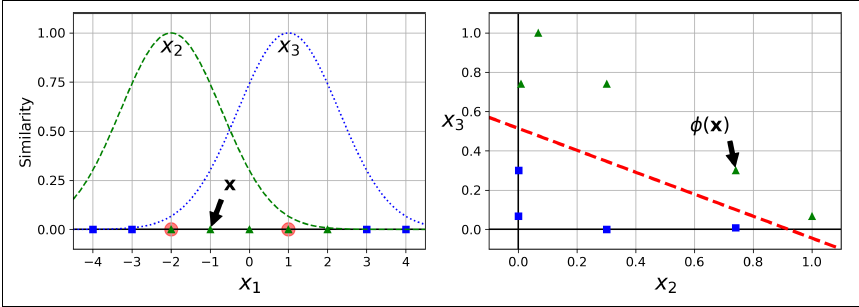

In [18]:
#*************************************************************************
# Gaussian RBF Kernel
#*************************************************************************
# Just like the polynomial features method, the similarity features method can be useful with any Machine Learning algorithm.
# But it may be computationally expensive to compute all the additional features, especially on large training sets.

rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

# This model is represented on the bottom left on the following figure
# The other plots show models trained with different values of hyperparameters gamma (γ) and C. 
# Increasing gamma makes the bell-shape curve narrower (see the left plot of previous figure), 
# and as a result each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. 
# Conversely, a small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother. 
# So γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it (similar to the C hyperparameter).

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

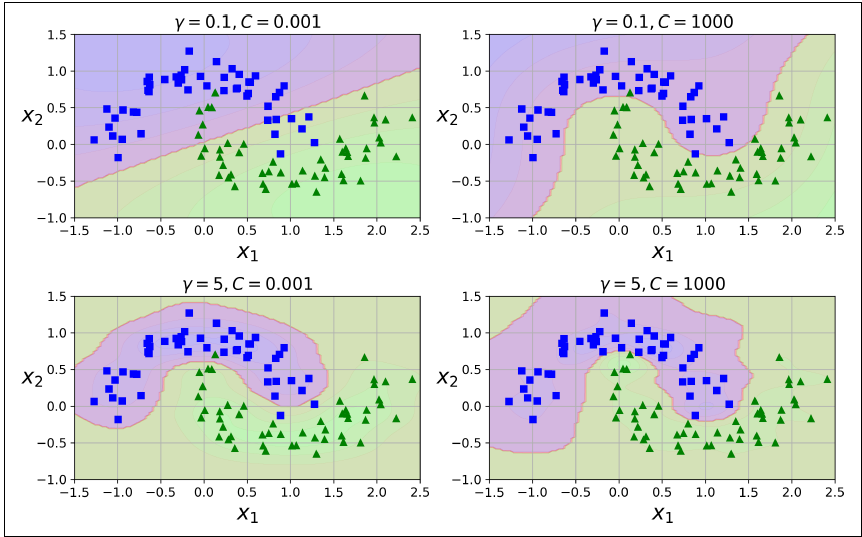

In [ ]:
# Other kernels exist, but are used less frequently. Some kernels are specialized for specific data structures. 
# String kernels are sometimes used when classifying text documents or DNA sequences (e.g., using the string subsequence kernel or kernels based on the Levenshtein distance).

# Which kernel to use?
# As a rule of thumb, you should always try the linear kernel first (remember that LinearSVC is much faster than SVC(kernel="linear")), especially if the training set is very large or if it has plenty of features.
# If the training set is not too large, you should try the Gaussian RBF kernel as well; it works well in most cases.
# Then if you have spare time and computing power, you can experiment with a few other kernels using cross-validation and grid search, especially if there are kernels specialized for your training set’s data structure.

##### Comparison of SVM classifications
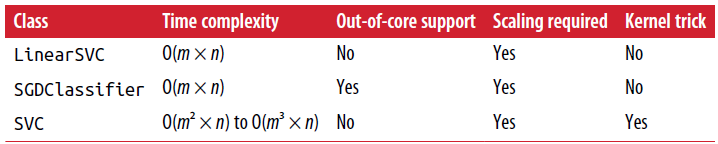

In [20]:
#*************************************************************************
# SVM Regression
#*************************************************************************
# SVMs are versatile: they can be used for classification, regression, and outlier detection.
# The trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, 
# SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street).
# The width of the street is controlled by a hyperparameter, ϵ.

# Implementing it in Scikit-Learn:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

# To tackle nonlinear regression tasks, you can use a kernelized SVM model.

# The SVR class is the regression equivalent of the SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class.
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)


c:\Users\fgrijalba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVR(C=100, degree=2, kernel='poly')

In [ ]:
#*************************************************************************
# Under the hood: Deeper understanding of SVMs
#*************************************************************************

# Starting with the linear SVM classifier model.
# Predicts the class of a new instance x by computing the decision function wT · x + b = w1 x1 + ⋯ + wn xn + b.
# if the result is positive, the predicted class ŷ is the positive class (1), and otherwise it is the negative class (0).

# In the following diagram, h is the decision function. The solid line is where h = 0. The dashed lines represent the points where h = 1 or h = –1.

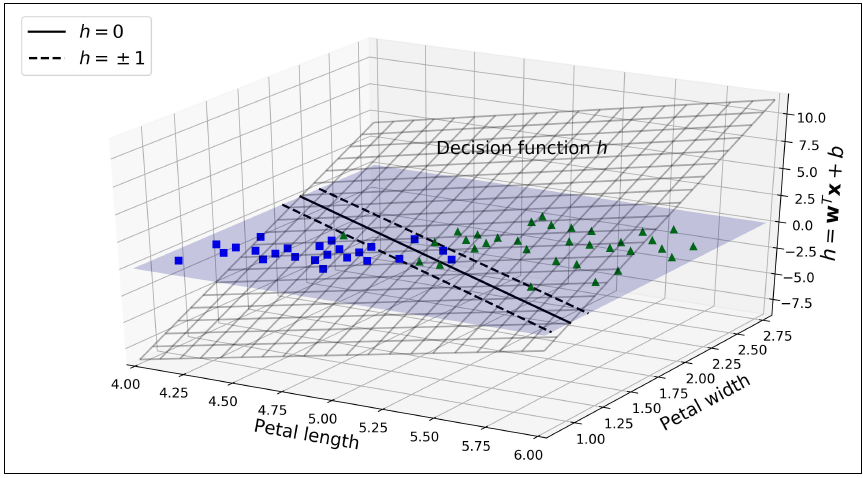

In [ ]:
# Training a linear SVM classifier means finding the values of w and b that make this margin as wide as possible 
# while avoiding margin violations (hard margin) or limiting them (soft margin).

# There is a "slack variable" ζ(i) ≥ 0 associated with each instance: it measures how much the ith instance is allowed to violate the margin.

# The objective is to maximize margins and minimize slack variables. This is controlled by the hyperparameter C: a smaller C value leads to a wider street but more margin violations.

## Quadradic Programming
# The hard margin and soft margin problems are both convex quadratic optimization problems with linear constraints.

## The Dual Problem
# Given a constrained optimization problem, known as the primal problem, it is possible to express a different but closely related problem, called its dual problem.
# The solution to the dual problem typically gives a lower bound to the solution of the primal problem, but under some conditions it can have the same solution as the primal problem.
# The SVM problem happens to meet these conditions (convex function, inequality constraints are differentiable and convex functions), 
# so you can choose to solve the primal problem or the dual problem; both will have the same solution. 

# The dual problem is faster to solve than the primal when the number of instances is smaller than the number of features.
# More importantly, it makes the kernel trick possible, while the primal does not.

## Kernel Trick
# The kernel trick makes it possible to obtain the same result as if you added many polynomial features, even with very high-degree polynomials, without actually having to add them.
# In ML, a "kernel" is a function capable of computing the dot product φ(a)T · φ(b) based only on the original vectors a and b, without having to compute (or even to know about) the transformation φ.

# Some of the most commonly used kernels are:
# Linear: h(x, x') = xT · x'
# Polynomial: h(x, x') = (γ xT · x' + r)d
# Gaussian RBF: h(x, x') = exp(−γ ||x − x'||^2)
# Sigmoid: h(x, x') = tanh(γ xT · x' + r)

